# Pierce - Predictive Diagnostics
Author: Leo Joseph (l1joseph@ucsd.edu)
The purpose of the notebook is to use q2-sample-classifier to identify whether whether features can discriminate between ASD and TD samples. 

In [55]:
# qiime2 imports
import qiime2 as q2
from qiime2 import Artifact, Metadata, Visualization
from qiime2.plugins.feature_table.methods import filter_features, filter_samples

# birdman imports
import biom
import pandas as pd
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## Load Artifacts

In [56]:
none_tp = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195330_none.zebra.tp-td.biom')
none = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195330_none.zebra.biom')
ec_tp = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195333_ec.zebra.tp-td.biom')
ec = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195333_ec.zebra.biom')
ko_tp = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195334_ko.zebra.tp-td.biom')
ko = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195334_ko.zebra.biom')
pathway = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195331_pathway.zebra.biom')
pathway_tp = biom.load_table('/home/lpatel/projects/2024-03-04_pierce-autism/out/195331_pathway.zebra.tp-td.biom')

md = Metadata.load('/home/lpatel/projects/2024-03-04_pierce-autism/qiita/15350_20240110-175840_noblanks.txt')
info = pd.read_csv('/home/lpatel/projects/2024-03-04_pierce-autism/ref/tryptophan_kegg.tsv', sep='\t', index_col=0)


### Convert to Q2 artifacts

In [57]:
none_qza = Artifact.import_data('FeatureTable[Frequency]', none)
none_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/none.qza')

none_tp_qza = Artifact.import_data('FeatureTable[Frequency]', none_tp)
none_tp_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/none_tp.qza')

ec_qza = Artifact.import_data('FeatureTable[Frequency]', ec)
ec_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/ec.qza')

ec_tp_qza = Artifact.import_data('FeatureTable[Frequency]', ec)
ec_tp_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/ec_tp.qza')


ko_qza = Artifact.import_data('FeatureTable[Frequency]', ko)
ko_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/ko.qza')

ko_tp_qza = Artifact.import_data('FeatureTable[Frequency]', ko)
ko_tp_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/ko_tp.qza')

pathway_qza = Artifact.import_data('FeatureTable[Frequency]', pathway)
pathway_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/pathway.qza')

pathway_tp_qza = Artifact.import_data('FeatureTable[Frequency]', pathway)
pathway_tp_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/pathway_tp.qza')

'/home/l1joseph/pierce_autism_2024/out/diag/pathway_tp.qza'

## ASD vs. TD

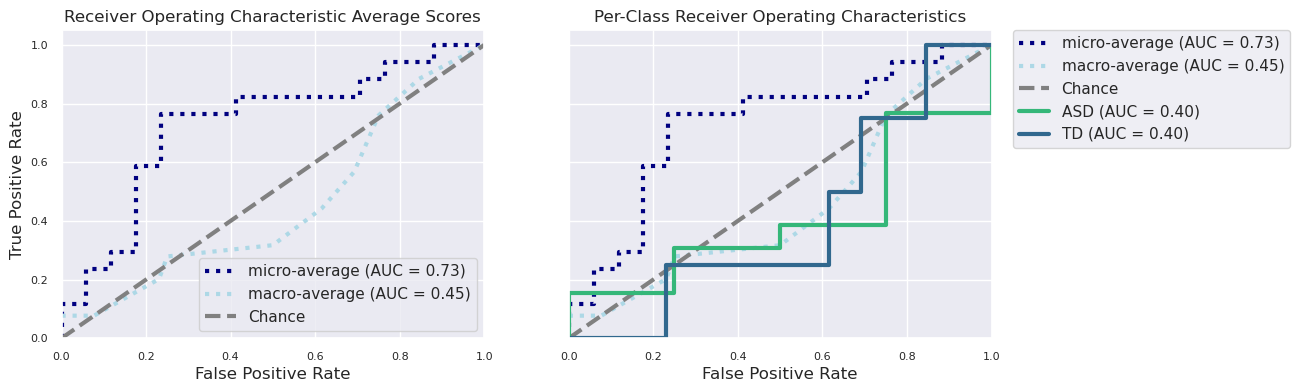

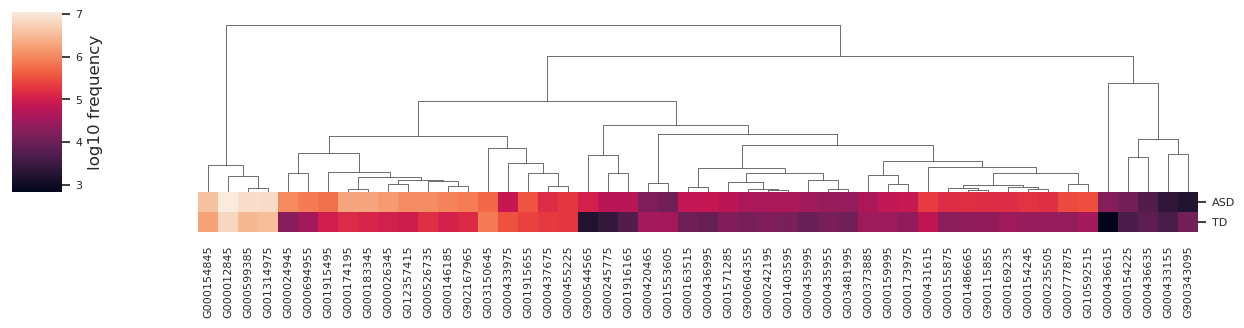

In [6]:
# for leo, example of running q2-sample-classifier
# docs: https://docs.qiime2.org/2024.5/plugins/available/sample-classifier/classify-samples/
# tutorial: https://docs.qiime2.org/2024.5/tutorials/sample-classifier/

from qiime2.plugins.sample_classifier.pipelines import classify_samples

# load table and metadata
diagnosis_column = md.get_column('dx')

results_none = classify_samples(
    table=none_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=4,
    random_state=42,
    n_jobs=8,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

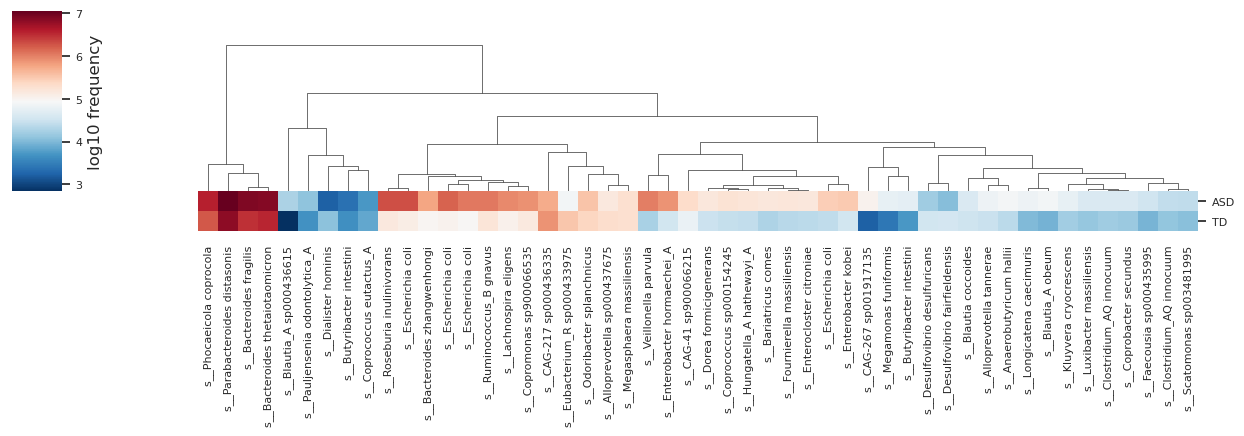

In [5]:
# example of how to modify default visualizations
# we will recolor and reannotate the heatmap
# docs: https://docs.qiime2.org/2024.5/plugins/available/sample-classifier/heatmap/

from qiime2.plugins.sample_classifier.pipelines import heatmap

taxonomy = Artifact.import_data('FeatureData[Taxonomy]', '/home/lpatel/projects/2024-03-04_pierce-autism/ref/lineages.txt')
taxonomy_df = taxonomy.view(pd.DataFrame)
taxonomy_df['Taxon'] = taxonomy_df['Taxon'].apply(lambda x: x.split(';')[-1].strip())

taxonomy_metadata = Metadata(taxonomy_df)
sample_metadata_column = md.get_column('dx') # country name
feature_metadata_column = taxonomy_metadata.get_column('Taxon') # species name

heatmap_results = heatmap(
    table=none_qza,
    importance=results_none.feature_importance,
    sample_metadata=sample_metadata_column,
    feature_metadata=feature_metadata_column,
    feature_count=50,  # number of features to include
    importance_threshold=0.00,  # set to 0.0 to include all features
    group_samples=True,  # group samples by country
    normalize=True,  # normalize the feature table
    metric='euclidean',  # distance metric
    method='average',  # clustering method
    cluster='features',  # cluster with features and/or samples
    color_scheme='RdBu_r'
)

# # save the new heatmap
# output_dir = "out"
# heatmap_results.heatmap.save(f"{output_dir}/annotated_heatmap.qzv")

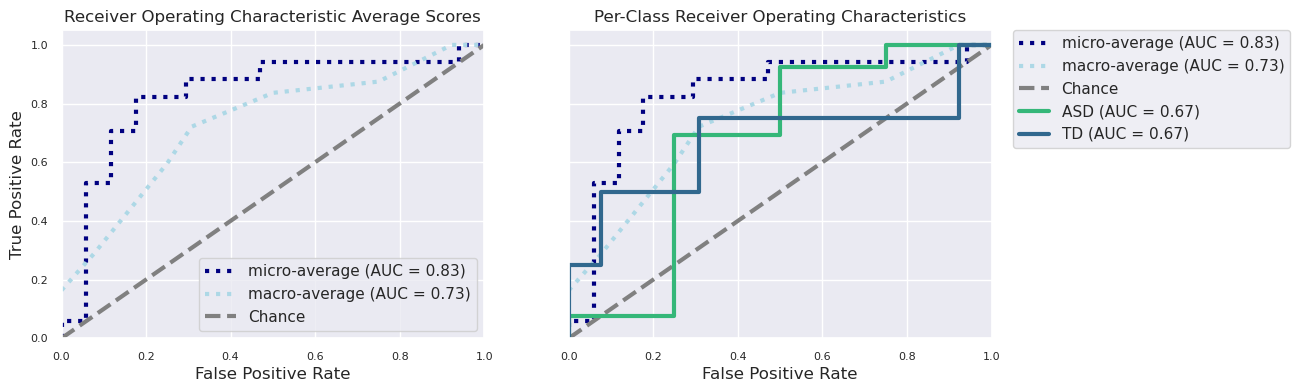

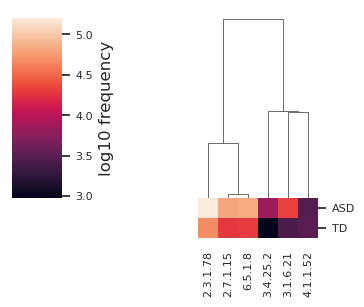

In [6]:
results_ec = classify_samples(
    table=ec_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=4,
    random_state=42,
    n_jobs=4,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

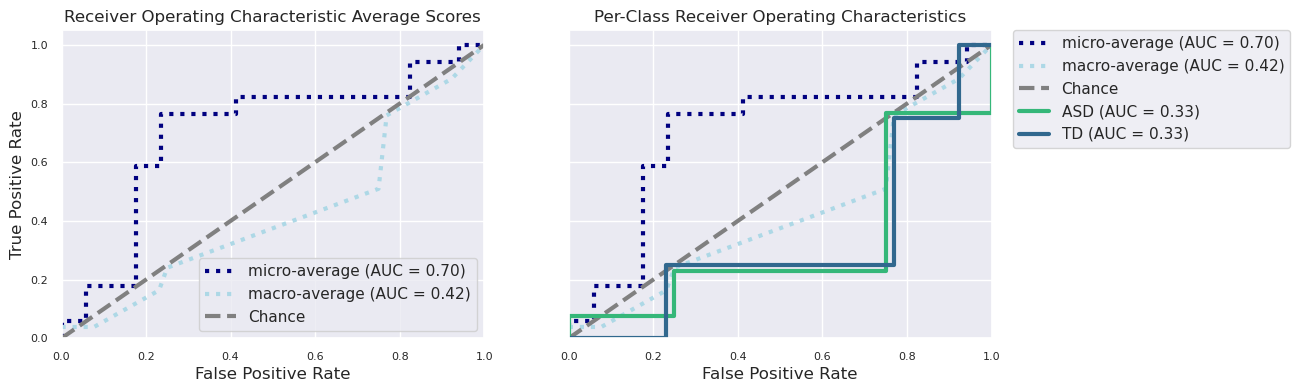

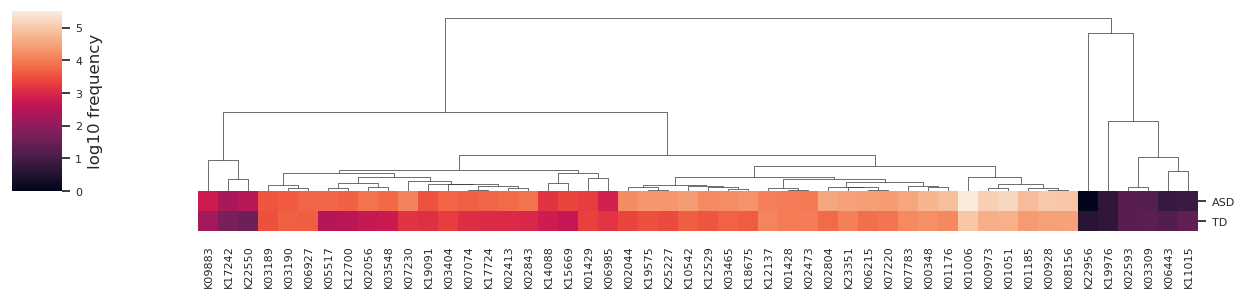

In [8]:
results_ko = classify_samples(
    table=ko_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.2,  # Increased from 0.1
    cv=4,
    random_state=42,
    n_jobs=4,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=False,  # Changed to False
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

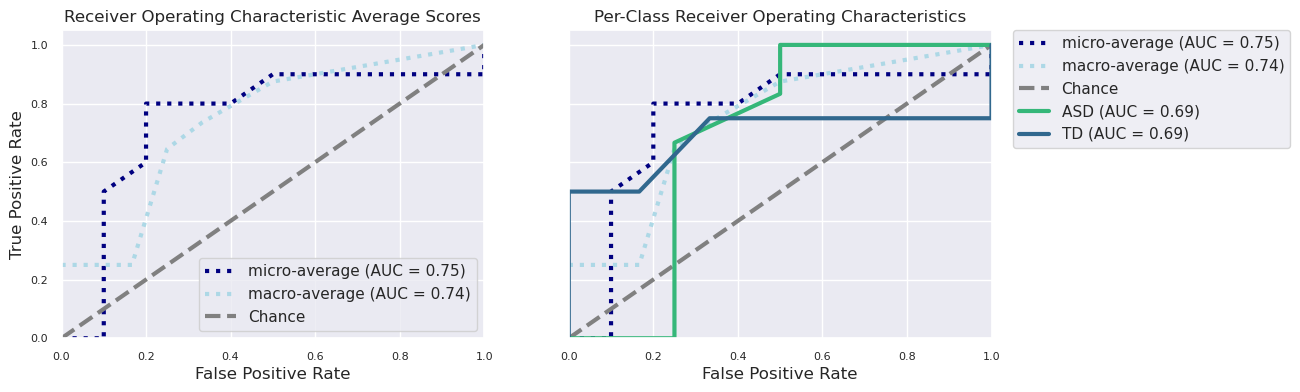

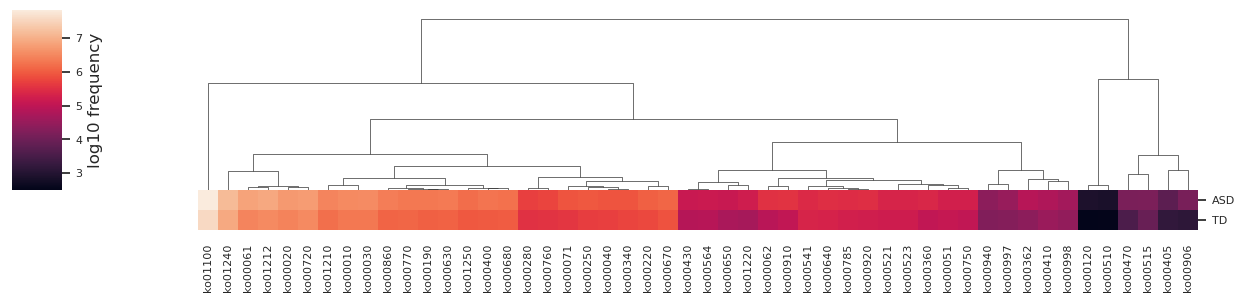

In [9]:
results_pathway = classify_samples(
    table=pathway_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=4,
    n_estimators=100,
    estimator='RandomForestClassifier',
    optimize_feature_selection=False,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

## ASD vs. ASD-TP vs. TD

In [21]:
# # Creating cumulative true positive score
# metadata = md.to_dataframe()

# # Create dx_eyetrack column for all cases
# metadata['dx_eyetrack'] = metadata['dx']

# # Filter for ASD cases
# asd_metadata = metadata[metadata['dx'] == 'ASD']

# # Identify ASD-TP cases
# tp_mask = asd_metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']].apply(lambda x: 'TP' in x.values, axis=1)

# # Update dx_eyetrack for ASD-TP cases
# metadata.loc[tp_mask.index[tp_mask], 'dx_eyetrack'] = 'ASD-TP'

# # Display the value counts of the updated dx_eyetrack column
# print(metadata['dx_eyetrack'].value_counts())
# # print(metadata['dx'].value_counts())

# meta_q2 = Metadata(metadata)
# meta_q2.get_column('dx_eyetrack')


metadata = md.to_dataframe()

def categorize_eyetrack(row):
    if row['dx'] == 'TD':
        return 'TD'
    elif row['dx'] == 'ASD':
        eyetrack_columns = ['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']
        if any(row[col] == 'TP' for col in eyetrack_columns):
            return 'ASD-TP'
        else:
            return 'ASD'
    else:
        return 'Unknown'

metadata['dx_eyetrack'] = metadata.apply(categorize_eyetrack, axis=1)

print(metadata['dx_eyetrack'].value_counts())

meta_q2 = Metadata(metadata)

dx_eyetrack_column = meta_q2.get_column('dx_eyetrack')

print(dx_eyetrack_column)

ASD       34
ASD-TP    29
TD        20
Name: dx_eyetrack, dtype: int64
<CategoricalMetadataColumn name='dx_eyetrack' id_count=83>


In [22]:
dx_eyetrack_column.to_dataframe().value_counts()

dx_eyetrack
ASD            34
ASD-TP         29
TD             20
dtype: int64

In [23]:
diagnosis_column

<CategoricalMetadataColumn name='dx' id_count=83>

In [24]:
# for leo, example of running q2-sample-classifier
# docs: https://docs.qiime2.org/2024.5/plugins/available/sample-classifier/classify-samples/
# tutorial: https://docs.qiime2.org/2024.5/tutorials/sample-classifier/

from qiime2.plugins.sample_classifier.pipelines import classify_samples

# load table and metadata
dx_eyetrack_column = meta_q2.get_column('dx_eyetrack')

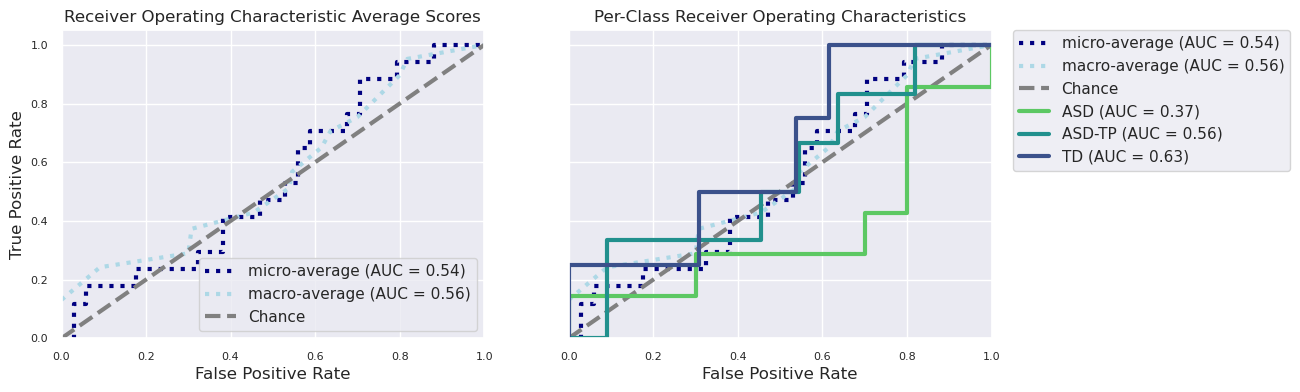

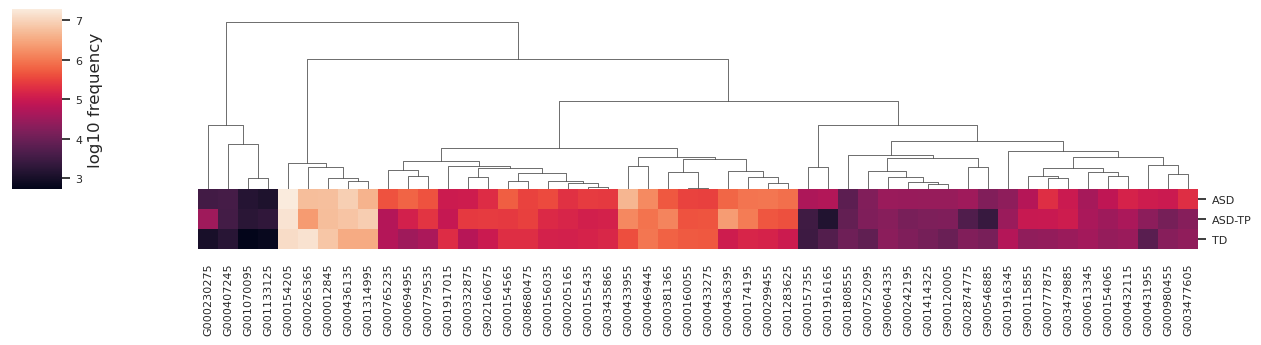

In [25]:
results_none_multiclass = classify_samples(
    table=none_qza,
    metadata=dx_eyetrack_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=8,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

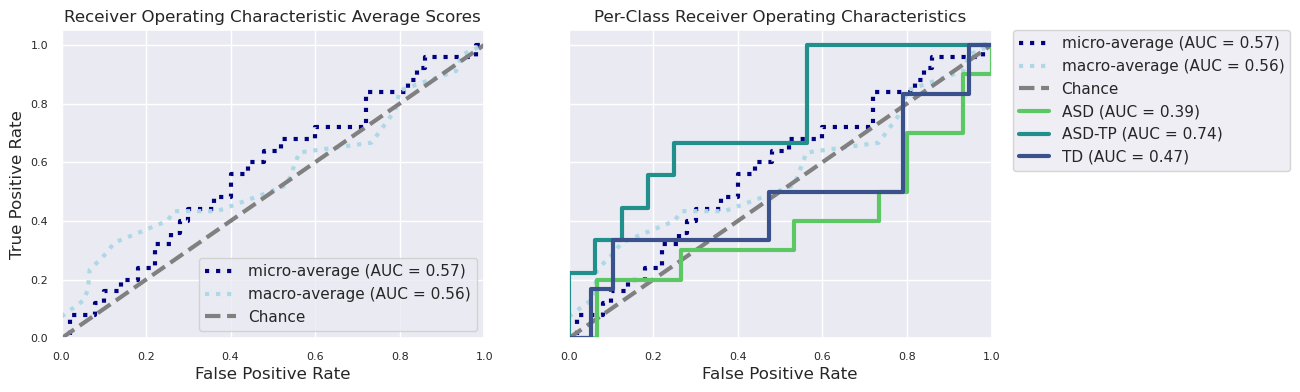

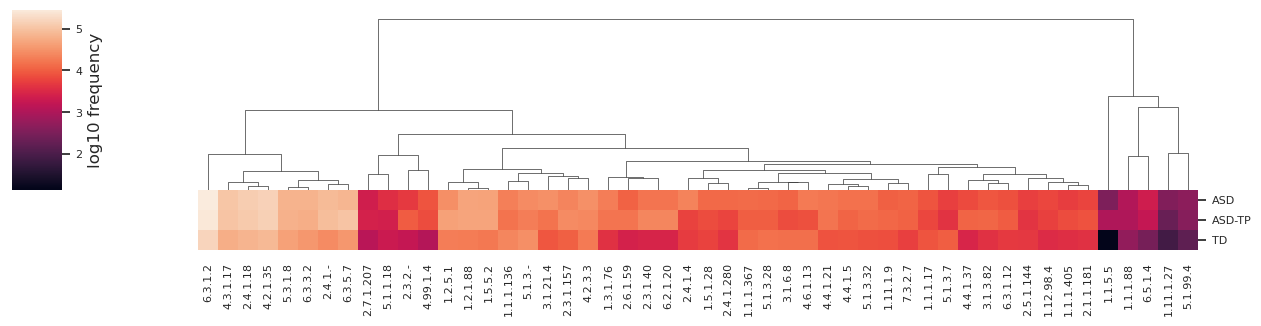

In [32]:
results_ec_multiclass = classify_samples(
    table=ec_qza,
    metadata=dx_eyetrack_column,
    test_size=0.3,  # Increased test size
    step=0.1,  # Increased step size
    cv=4,  # Changed cross-validation folds
    random_state=42,  # Kept the same
    n_jobs=8,  # Kept the same
    n_estimators=50,  # Reduced number of estimators
    estimator='RandomForestClassifier',  # Changed estimator
    optimize_feature_selection=True,  # Disabled feature selection
    parameter_tuning=True,  # Disabled parameter tuning
    palette='viridis',
    missing_samples='ignore'  # Changed to ignore missing samples
)

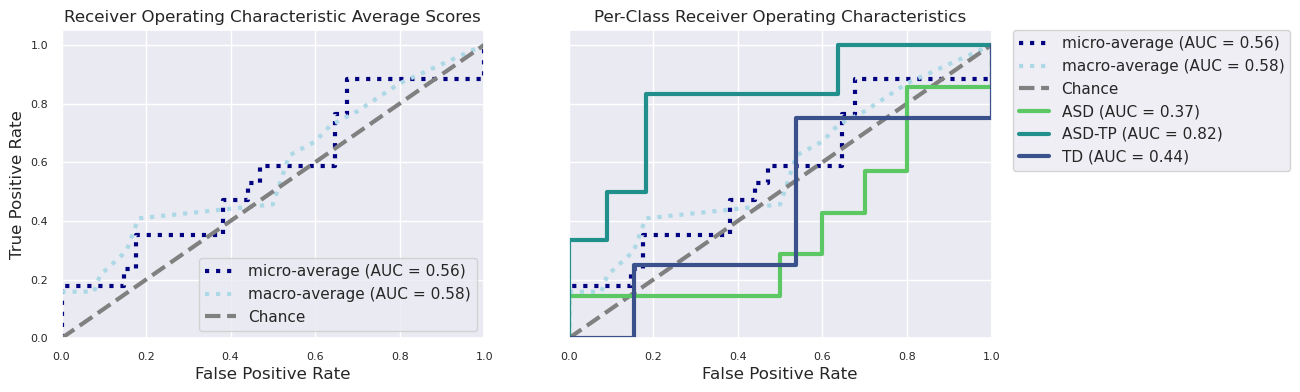

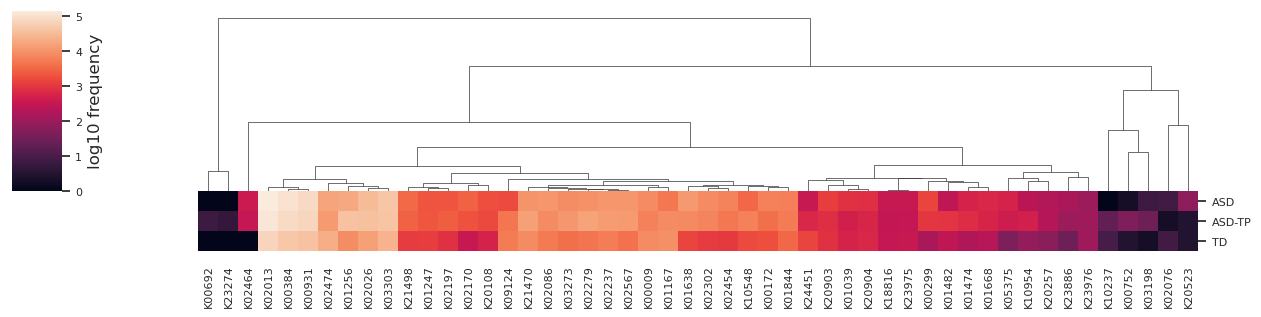

In [15]:
results_ko_multiclass = classify_samples(
    table=ko_qza,
    metadata=dx_eyetrack_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=8,
    n_estimators=50,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

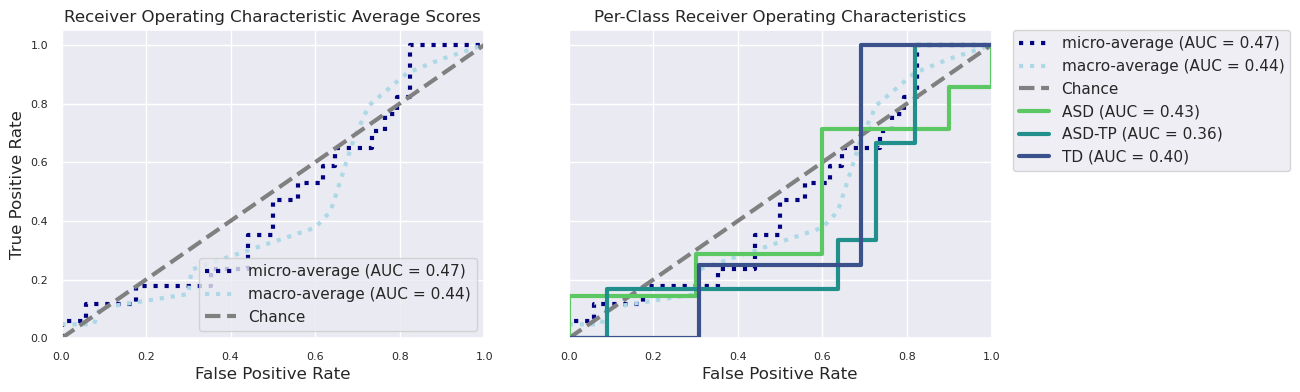

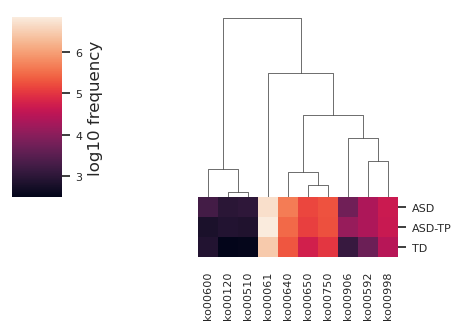

In [26]:
results_pathway_multiclass = classify_samples(
    table=pathway_qza,
    metadata=dx_eyetrack_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=8,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

## ASD-TP vs. TD

In [33]:
# for leo, example of running q2-sample-classifier
# docs: https://docs.qiime2.org/2024.5/plugins/available/sample-classifier/classify-samples/
# tutorial: https://docs.qiime2.org/2024.5/tutorials/sample-classifier/

from qiime2.plugins.sample_classifier.pipelines import classify_samples


# Creating cumulative true positive score
metadata = md.to_dataframe()

# Creating a df that indicates whether the sample is TP in one or more of the eye-tracking metrics
dx_tptd = pd.DataFrame(index=metadata.index)
dx_tptd['dx_tptd'] = metadata['dx']

# Joining the dx_eyetrack DataFrame with the asd_metadata DataFrame
md_tp = metadata.join(dx_tptd)

# Renaming labels in dx_eyetrack
md_tp['dx_tptd'] = md_tp['dx_tptd'].map({'ASD': 'ASD-TP', 'TD': 'TD'})


# Display the value counts of the updated dx_eyetrack column
print(md_tp['dx_tptd'].value_counts())
print(md_tp['dx'].value_counts())

# load table and metadata
meta_q2_tptd = Metadata(md_tp)
diagnosis_column = meta_q2_tptd.get_column('dx_tptd')

ASD-TP    63
TD        20
Name: dx_tptd, dtype: int64
ASD    63
TD     20
Name: dx, dtype: int64


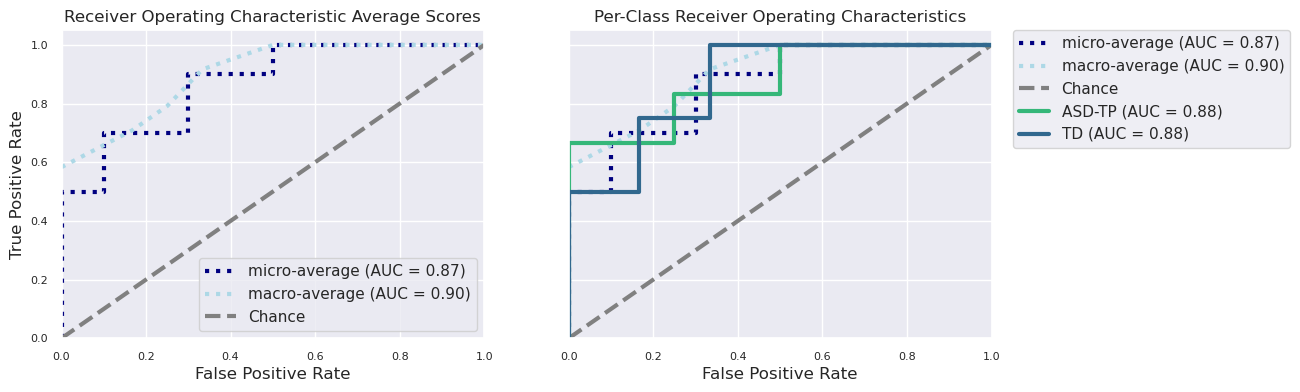

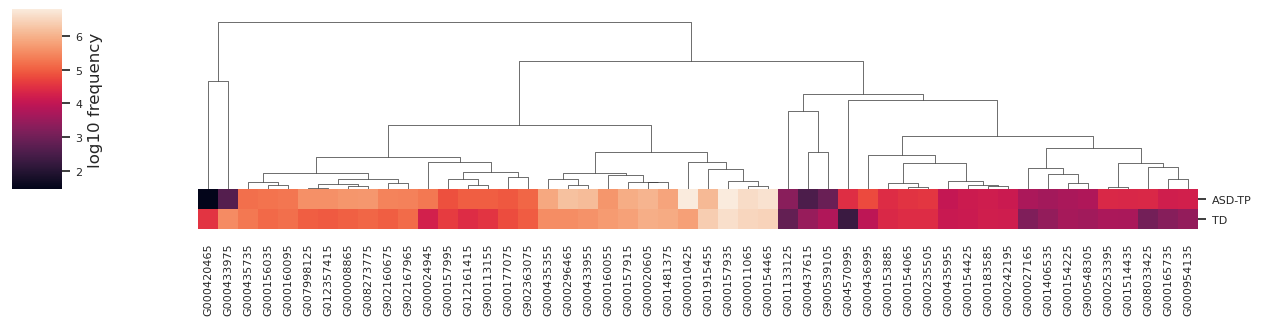

In [34]:
results_none_tptd = classify_samples(
    table=none_tp_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=4,
    random_state=42,
    n_jobs=8,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

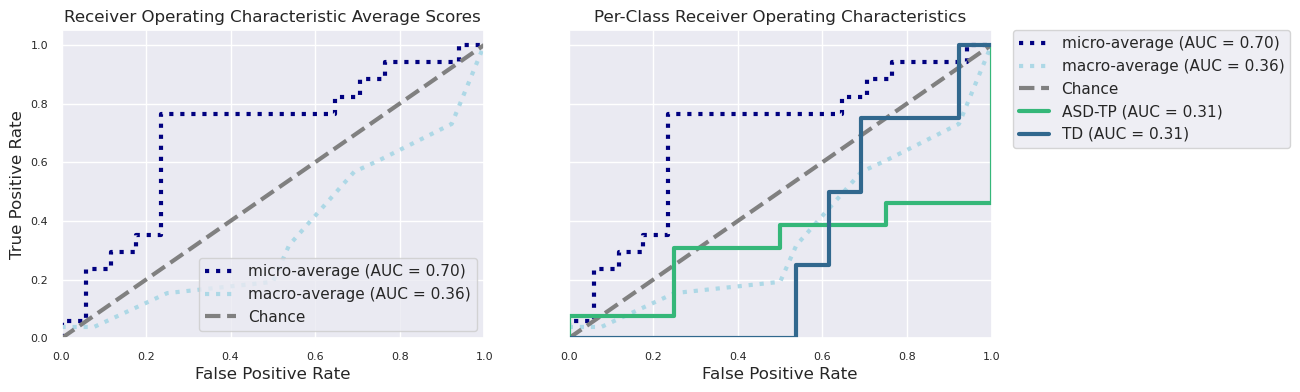

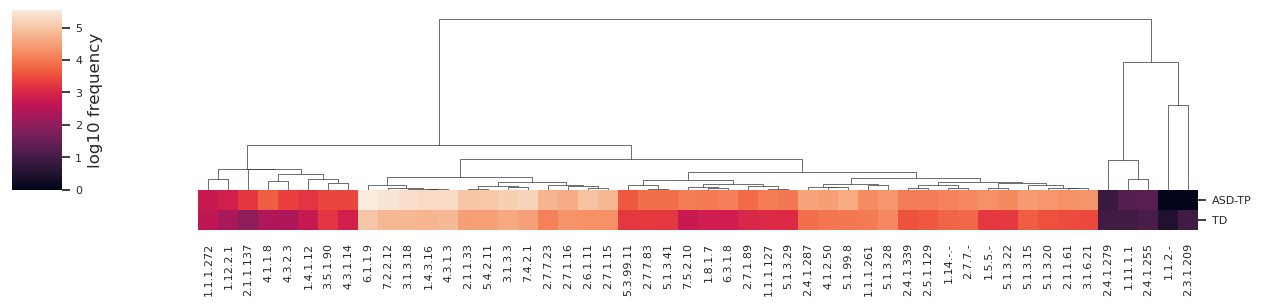

In [35]:
results_ec_tptd = classify_samples(
    table=ec_tp_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=8,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

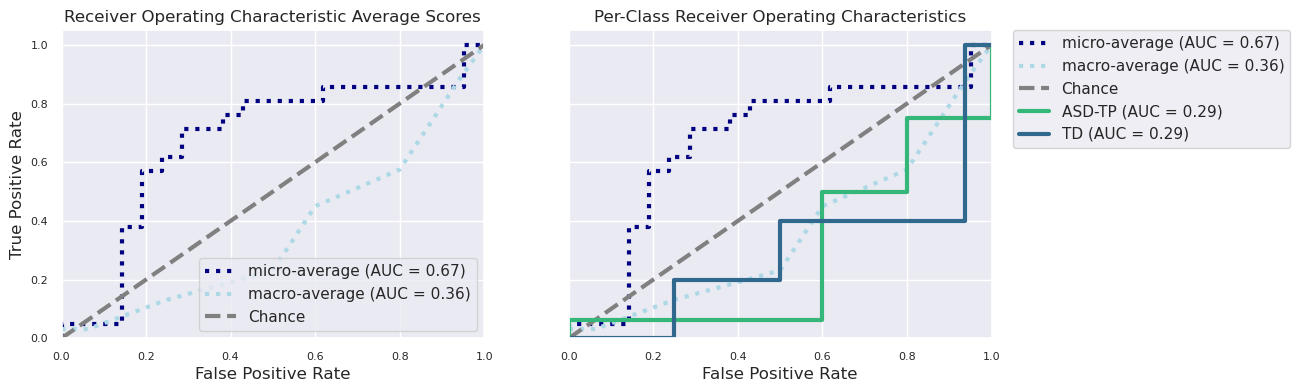

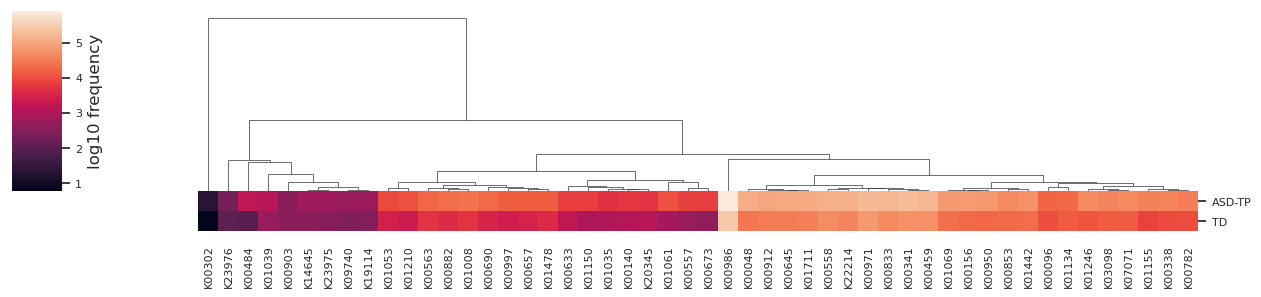

In [38]:
results_ko_tptd = classify_samples(
    table=ko_tp_qza,
    metadata=diagnosis_column,
    test_size=0.25,
    step=0.1,
    cv=4,
    random_state=42,
    n_jobs=8,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

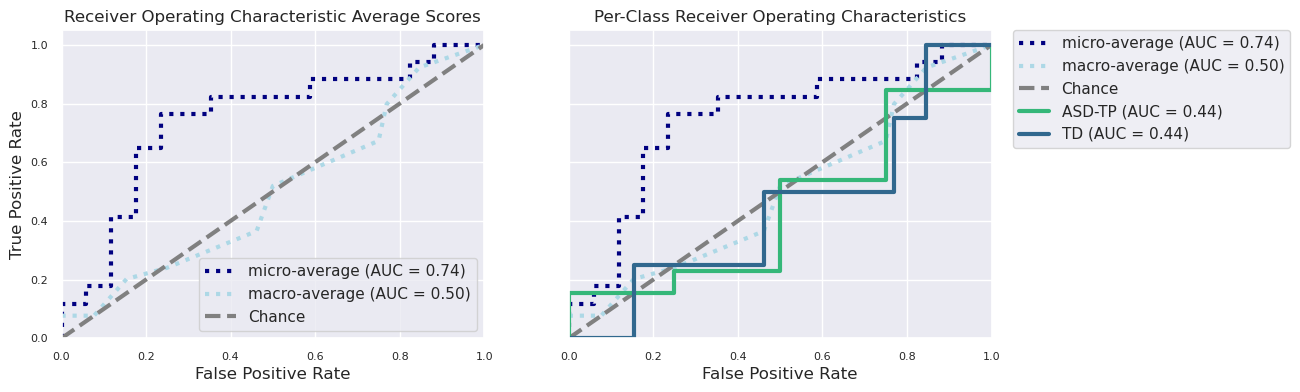

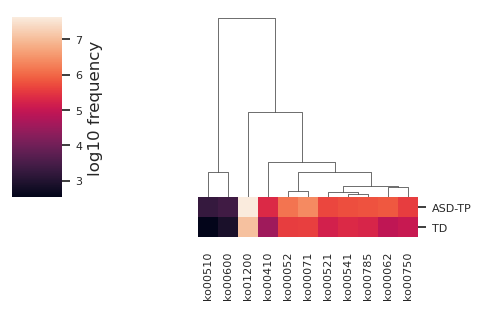

In [40]:
results_pathway_tptd = classify_samples(
    table=pathway_tp_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=4,
    random_state=42,
    n_jobs=8,
    n_estimators=100,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

## ASD vs. ASD-TP

In [58]:
from qiime2.plugins.sample_classifier.pipelines import classify_samples

# Creating cumulative true positive score
metadata = md.to_dataframe()

# Filter for ASD cases first
asd_metadata = metadata[metadata['dx'] == 'ASD'].copy()

# Creating a df that indicates whether the sample is TP in one or more of the eye-tracking metrics
dx_eyetrack = pd.DataFrame(index=asd_metadata.index)
dx_eyetrack['dx_eyetrack'] = asd_metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']].apply(lambda x: 1 if 'TP' in x.values else 0, axis=1)

# Joining the dx_eyetrack DataFrame with the asd_metadata DataFrame
md_tp = asd_metadata.join(dx_eyetrack)

# Renaming labels in dx_eyetrack
md_tp['dx_eyetrack'] = md_tp['dx_eyetrack'].map({1: 'ASD-TP', 0: 'ASD'})

metadata_df = md_tp

# Display the value counts of the updated dx_eyetrack column
print(md_tp['dx_eyetrack'].value_counts())
print(md_tp['dx'].value_counts())

# load table and metadata
meta_q2_asd_tp = Metadata(md_tp)
diagnosis_column = meta_q2_asd_tp.get_column('dx_eyetrack')

ASD       34
ASD-TP    29
Name: dx_eyetrack, dtype: int64
ASD    63
Name: dx, dtype: int64


### Drop TP samples from table

In [59]:
# Get the ASD sample IDs from md_tp
asd_sample_ids = md_tp.index

# Filter the none biom table to keep only the ASD sample IDs
asd_filtered_none = none.filter(asd_sample_ids, axis='sample', inplace=False)
asd_filtered_ec = ec.filter(asd_sample_ids, axis='sample', inplace=False)
asd_filtered_ko = ko.filter(asd_sample_ids, axis='sample', inplace=False)
asd_filtered_pathway = pathway.filter(asd_sample_ids, axis='sample', inplace=False)


if set(md_tp.index) == set(filtered_none.ids(axis='sample')):
    print("It's a good day")
    asd_filtered_none_qza = Artifact.import_data('FeatureTable[Frequency]', asd_filtered_none)
    asd_filtered_none_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/asd_filtered_none.qza')
    
    asd_filtered_ec_qza = Artifact.import_data('FeatureTable[Frequency]', asd_filtered_ec)
    asd_filtered_ec_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/asd_filtered_ec.qza')
        
    asd_filtered_ko_qza = Artifact.import_data('FeatureTable[Frequency]', asd_filtered_ko)
    asd_filtered_ko_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/asd_filtered_ko.qza')
    
    asd_filtered_pathway_qza = Artifact.import_data('FeatureTable[Frequency]', asd_filtered_pathway)
    asd_filtered_pathway_qza.save(f'/home/l1joseph/pierce_autism_2024/out/diag/asd_filtered_pathway.qza')
else:
    print(":(")

It's a good day


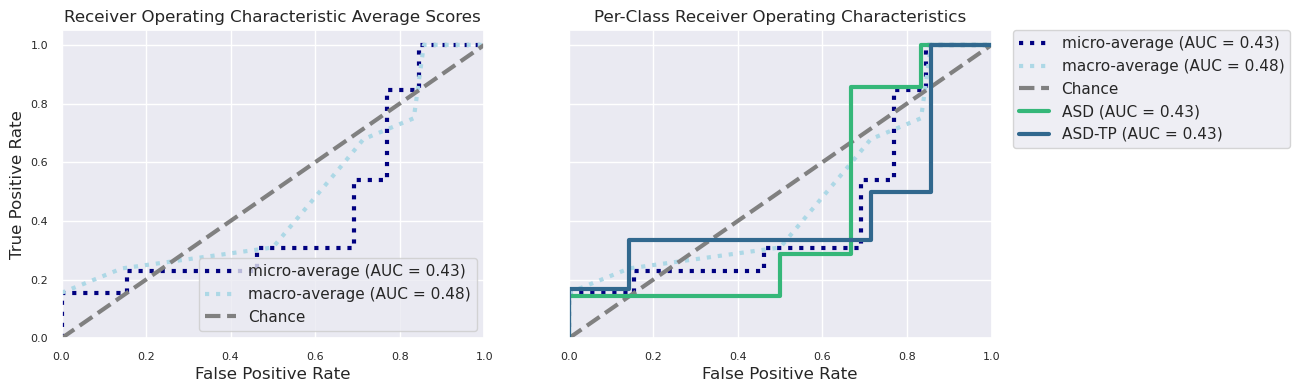

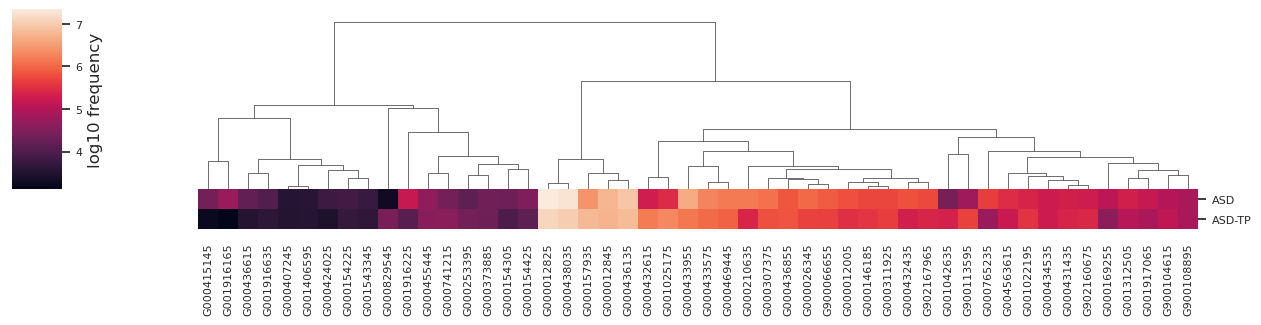

In [70]:
results_none_asd_tp = classify_samples(
    table=asd_filtered_none_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=8,
    n_estimators=200,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

In [ ]:
results_ec_asd_tp = classify_samples(
    table=asd_filtered_ec_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=8,
    n_estimators=200,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

In [ ]:
results_ko_asd_tp = classify_samples(
    table=asd_filtered_ko_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=8,
    n_estimators=200,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

In [ ]:
results_pathway_asd_tp = classify_samples(
    table=asd_filtered_pathway_qza,
    metadata=diagnosis_column,
    test_size=0.2,
    step=0.1,
    cv=5,
    random_state=42,
    n_jobs=8,
    n_estimators=200,
    estimator='GradientBoostingClassifier',
    optimize_feature_selection=True,
    parameter_tuning=True,
    palette='viridis',
    missing_samples='error'
)

## ASD(w/o TP) vs TD

In [ ]:
# Creating cumulative true positive score
metadata = md.to_dataframe()

# Filter for ASD cases first
asd_metadata = metadata[metadata['dx'] == 'ASD'].copy()

# Creating a df that indicates whether the sample is TP in one or more of the eye-tracking metrics
dx_eyetrack = pd.DataFrame(index=asd_metadata.index)
dx_eyetrack['dx_eyetrack'] = asd_metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']].apply(lambda x: 1 if 'TP' in x.values else 0, axis=1)

# Joining the dx_eyetrack DataFrame with the asd_metadata DataFrame
md_tp = asd_metadata.join(dx_eyetrack)

# Renaming labels in dx_eyetrack
md_tp['dx_eyetrack'] = md_tp['dx_eyetrack'].map({1: 'ASD-TP', 0: 'ASD'})

metadata_df = md_tp

# Display the value counts of the updated dx_eyetrack column
print(md_tp['dx_eyetrack'].value_counts())
print(metadata['dx'].value_counts())